In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk import *
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('Resources/fake_job_postings.csv')

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,US; NY; New York,Marketing,NaN,We're Food52 and we've created a groundbreakin...,Food52 a fast-growing James Beard Award-winnin...,Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,NZ; ; Auckland,Success,NaN,90 Seconds the worlds Cloud Video Production S...,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),US; IA; Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,US; DC; Washington,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,EDUCATION: Bachelor’s or Master’s in GIS busin...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,US; FL; Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Data structure analysis

In [13]:
df.shape

(17880, 18)

In [48]:
df.nunique()

job_id                 17880
title                  11228
location                3105
department              1337
salary_range             874
company_profile         1709
description            14796
requirements           11966
benefits                6202
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [5]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Text(0, 0.5, 'Count')

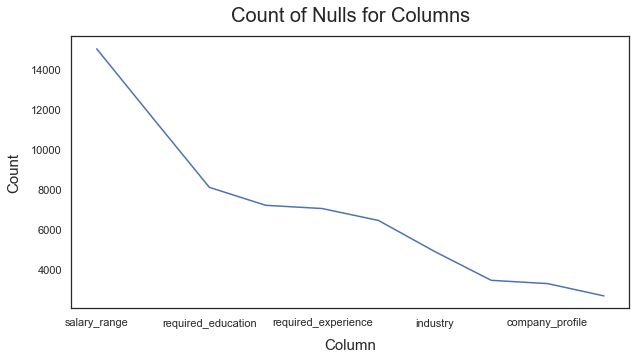

In [53]:
count_na = df.isna().sum().sort_values(ascending=False)
not_top_ten = len(count_na) - 10
not_top_ten_sum = count_na.tail(not_top_ten).sum()
s_top = count_na.head(10)
figure = plt.figure(figsize = (10,5))
s_top.plot()
plt.title('Count of Nulls for Columns', pad=15, size=20)
plt.xlabel('Column',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

In [11]:
total_jobs = len(df.index)

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


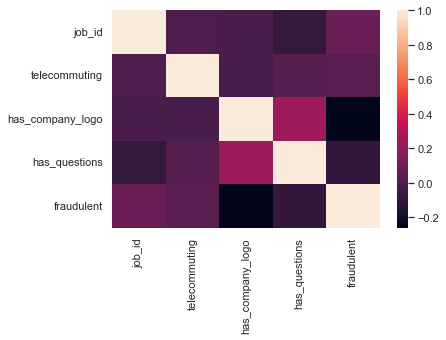

In [19]:
# no correlation
heatmap = df.corr()
sns.set_theme(style="white")
sns.heatmap(heatmap)
plt.show()


Text(0, 0.5, 'Count')

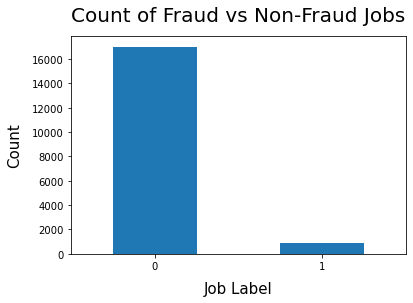

In [23]:
# plot of fraud vs not fraud
count_bar = df['fraudulent'].value_counts().plot(kind='bar', rot=0)
plt.title('Count of Fraud vs Non-Fraud Jobs', pad=15, size=20)
plt.xlabel('Job Label',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

In [8]:
# split fraud and non fraud into counts
fraud_df = df[df['fraudulent'] == 1]
non_fraud_df = df[df['fraudulent'] == 0]

array([[<AxesSubplot:title={'center':'telecommuting'}>,
        <AxesSubplot:title={'center':'has_company_logo'}>],
       [<AxesSubplot:title={'center':'has_questions'}>,
        <AxesSubplot:title={'center':'fraudulent'}>]], dtype=object)

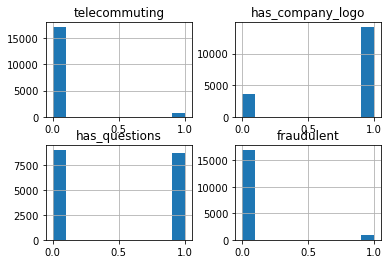

In [3]:
df.hist()

# Unique Values

In [4]:
df.nunique().sort_values(ascending=False)

job_id                 17880
description            14796
requirements           11966
title                  11228
benefits                6202
location                3105
company_profile         1709
department              1337
salary_range             874
industry                 131
function                  37
required_education        13
required_experience        7
employment_type            5
telecommuting              2
has_questions              2
has_company_logo           2
fraudulent                 2
dtype: int64

Text(0, 0.5, 'Count')

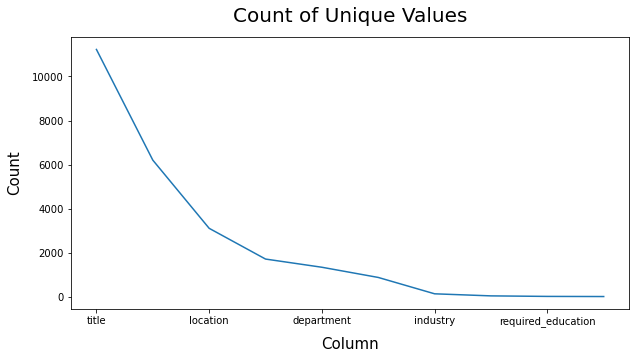

In [7]:
# no job_id
df_u = df.drop(columns=['job_id', 'description', 'requirements'])
count_unique = df_u.nunique().sort_values(ascending=False)
not_top_ten = len(count_unique) - 10
not_top_ten_sum = count_unique.tail(not_top_ten).sum()
count_top = count_unique.head(10)
figure = plt.figure(figsize = (10,5))
count_top.plot()
plt.title('Count of Unique Values', pad=15, size=20)
plt.xlabel('Column',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

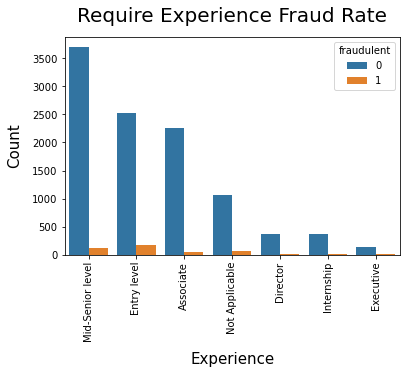

In [18]:
sns.countplot(x=df['required_experience'], data=df, hue="fraudulent",
              order=df['required_experience'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Require Experience Fraud Rate', pad=15, size=20)
plt.xlabel('Experience',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

17014 866 17880


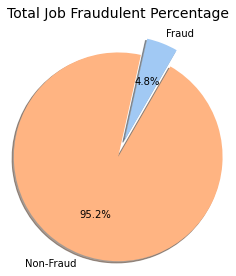

In [25]:
# counts of df
total_count = len(df.index)
fraud_count = len(fraud_df.index)
non_fraud_count = len(non_fraud_df.index)

print(non_fraud_count, fraud_count, total_count)

# pie chart - % fraud vs non fraud
labels = 'Fraud', 'Non-Fraud'
data = [fraud_count, non_fraud_count]
colors = sns.color_palette('pastel')

# customizations
explode = [0.2,0]
plt.title('Total Job Fraudulent Percentage', pad=30, fontsize=14)

plot = plt.pie(data, labels=labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle=60, radius=1.2, colors=colors)


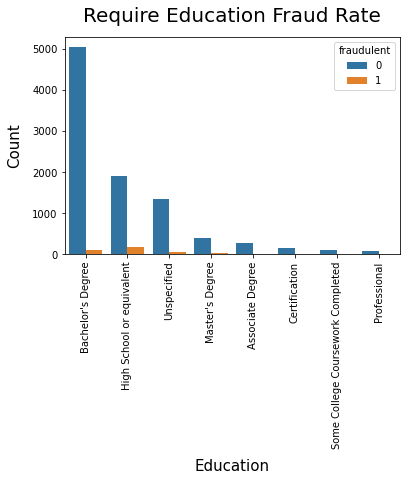

In [22]:
# req education
sns.countplot(x=df['required_education'], data=df, hue="fraudulent",
              order=df['required_education'].value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.title('Require Education Fraud Rate', pad=15, size=20)
plt.xlabel('Education',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

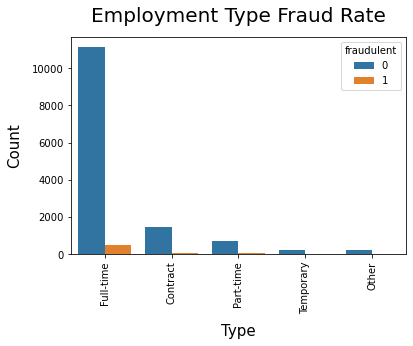

In [23]:
# req education
sns.countplot(x=df['employment_type'], data=df, hue="fraudulent",
              order=df['employment_type'].value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.title('Employment Type Fraud Rate', pad=15, size=20)
plt.xlabel('Type',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

# Word Cloud

In [12]:
df['text']=df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
df['text']
tokenizer = nltk.RegexpTokenizer(r"\w+")
df['text'].isna().sum()

NameError: name 'toknizer' is not defined

In [6]:
df.text.fillna(' ', inplace=True)
df['text'].isna().sum()

0

In [8]:
text = df['text'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

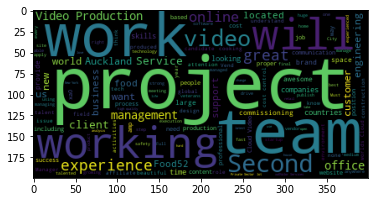